In [31]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pyproj
import osmnx
from geopy import distance
import seaborn as sns

In [2]:
smartDf= pd.read_csv("archive/smart_mobility_dataset.csv")

In [3]:
smartDf["coordinate"]=smartDf.apply(lambda x: (x["Latitude"], x["Longitude"]), axis=1)

In [4]:
center_point_x=sum(smartDf["Latitude"])/smartDf.shape[0]
center_point_y=sum(smartDf["Longitude"])/smartDf.shape[0]
center_point=(center_point_x, center_point_y)
max_distance= max(smartDf.apply(lambda x: distance.distance((center_point[0], center_point[1]), (x["Latitude"],
                                                                   x["Longitude"])
                                                                  ), axis=1)
                 )

In [8]:
roads=osmnx.graph.graph_from_point(center_point=center_point, dist=max_distance.m*1.2, network_type="drive")

In [14]:
osmnx.io.save_graphml(roads)

In [ ]:
roads= osmnx.io.load_graphml("data/road.graphml")

In [25]:
smartDf

,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition,coordinate
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,Yellow,Clear,0,-0.609199,2,45,450.760055,19.574337,High,"(40.84227529289184, -73.70314869323049)"
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,Green,Clear,0,0.965442,16,1,321.800341,5.385554,High,"(40.8311193987152, -73.9873540904415)"
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,Green,Rain,0,0.289660,16,49,231.152655,10.277477,High,"(40.81954876392327, -73.73246185831279)"
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,Red,Fog,0,-0.271965,66,10,410.384292,29.243279,High,"(40.72584887921568, -73.98013411315877)"
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,Red,Snow,0,-0.797606,3,5,364.466342,16.801459,Low,"(40.81326467769622, -73.96163054358502)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-03-18 08:15:00,40.604663,-73.831032,266,22.987611,12.670629,Green,Rain,0,0.698929,87,28,252.070807,7.511153,High,"(40.60466323227797, -73.83103241806708)"
4996,2024-03-18 08:20:00,40.733790,-73.752213,20,75.736987,49.108556,Green,Snow,0,0.742800,5,0,203.563872,6.681980,Low,"(40.733790497065, -73.7522129625755)"
4997,2024-03-18 08:25:00,40.821354,-73.759376,43,59.492981,78.719110,Yellow,Clear,0,0.524574,94,16,71.660296,25.267246,Medium,"(40.82135366815789, -73.75937617251822)"
4998,2024-03-18 08:30:00,40.772343,-73.836698,88,25.901119,64.690719,Yellow,Rain,0,-0.589902,73,5,442.692618,29.467326,Medium,"(40.77234305363285, -73.83669765444564)"


In [16]:
smartDf["Accident_Report"].value_counts()

Accident_Report
0    4520
1     480
Name: count, dtype: int64

In [22]:
bins=pd.cut(smartDf["Accident_Report"], bins=int((smartDf["Vehicle_Count"].max())/50)) 

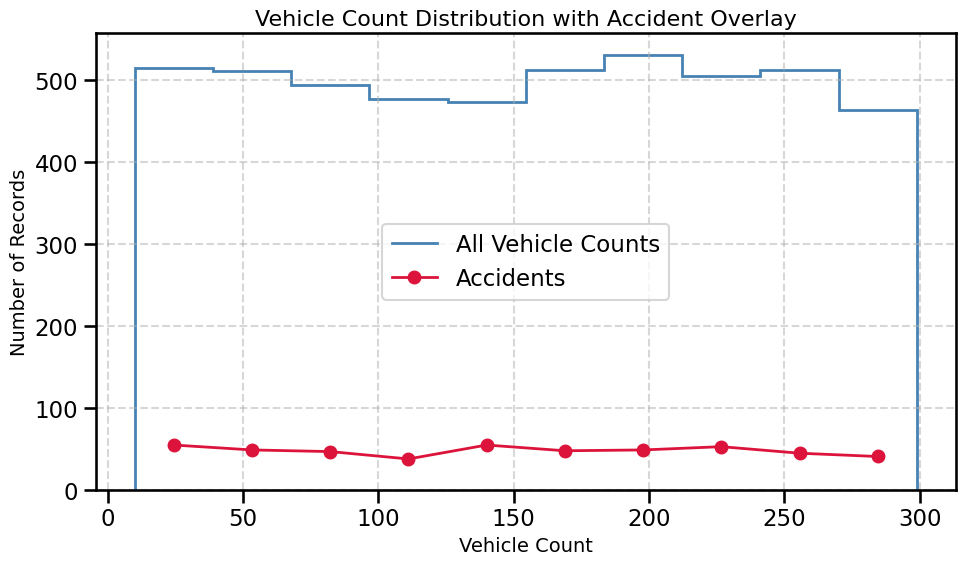

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_context("talk")

# Compute histograms
counts_all, bins = np.histogram(smartDf["Vehicle_Count"])
counts_accidents, _ = np.histogram(smartDf[smartDf["Accident_Report"] == 1]["Vehicle_Count"], bins=bins)

# Compute bin centers for the accident line plot
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Stairs for total vehicle counts
ax.stairs(counts_all, bins, label="All Vehicle Counts", color="steelblue", linewidth=2)

# Line plot for accidents
ax.plot(bin_centers, counts_accidents, label="Accidents", color="crimson", linewidth=2, marker="o")

# Labels and styling
ax.set_title("Vehicle Count Distribution with Accident Overlay", fontsize=16)
ax.set_xlabel("Vehicle Count", fontsize=14)
ax.set_ylabel("Number of Records", fontsize=14)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


TypeError: _AxesBase.add_line() got an unexpected keyword argument 'label'

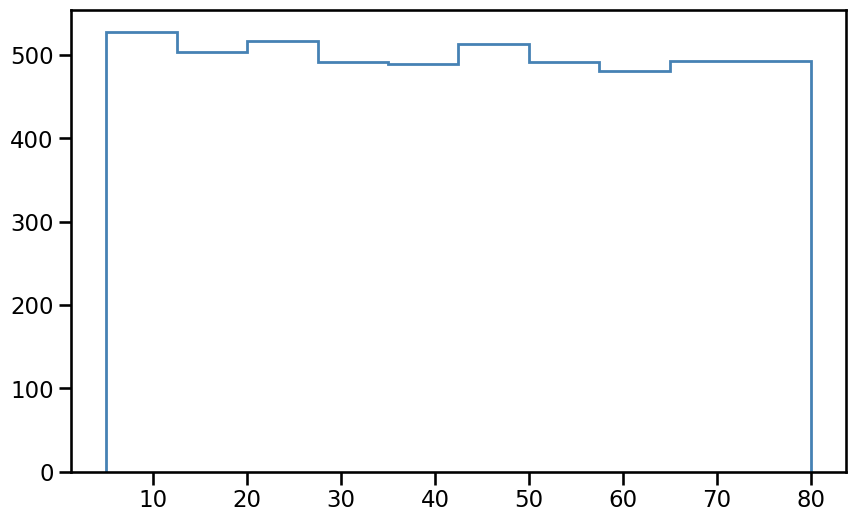

In [39]:

sns.set_context("talk")
counts_speed, bins = np.histogram(smartDf["Traffic_Speed_kmh"])
counts_accidents, _ = np.histogram(smartDf[smartDf["Accident_Report"] == 1]["Vehicle_Count"], bins=bins)

fig, ax = plt.subplots(figsize=(10, 6))
ax.stairs(counts_speed, bins, label="Vehicle Speed", color="steelblue", linewidth=2)
ax.stairs(counts_accidents, bins, label="Accidents", color="crimson", linewidth=2)

ax.set_title("Vehicle Count Distribution with Accident Overlay", fontsize=16)
ax.set_xlabel("Vehicle Count", fontsize=14)
ax.set_ylabel("Number of accidents", fontsize=14)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
